# МГТУ им. Н.Э.Баумана | ИУ5 | 6 семестр | ТМО | РК№1

#### ИУ5-63Б | Нагапетян Валерий | Вариант № 15
<b>Заданиe</b>: https://github.com/ugapanyuk/courses_current/wiki/TMO_RK_1

<b>Датасет</b>: https://www.kaggle.com/datasets/lava18/google-play-store-apps?resource=download

<b>Задача №2.</b> Для заданного набора данных проведите обработку пропусков в данных для одного категориального и одного количественного признака. Какие способы обработки пропусков в данных для категориальных и количественных признаков Вы использовали? Какие признаки Вы будете использовать для дальнейшего построения моделей машинного обучения и почему?

Для произвольной колонки данных построить график "Ящик с усами (boxplot)".

### Импортируем необходимые зависимости

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Загружаем датасет и выводим информацию о нем

In [77]:
df = pd.read_csv("googleplaystore.csv")
df.info()
df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


### Проверяем количество пропусков в данных

In [78]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

### Обрабатываем пропуски

#### Для количественного признака Rating

Метод: Замена на медиану.
Почему?
- `Rating` — числовая величина, которая может содержать выбросы (например, приложения с аномально высокими или низкими оценками).
- Медиана менее чувствительна к выбросам, чем среднее (mean), поэтому она лучше сохраняет распределение данных.

In [79]:
median_rating = df['Rating'].median()
df['Rating'] = df['Rating'].fillna(median_rating)

#### Для категориального признака Type
Метод: Замена на моду.
Почему?
- `Type` — категориальный признак (значения Free/Paid).
- В датасете всего 1 пропуск, поэтому логично заменить его на самое распространённое значение (Free, так как бесплатных приложений в магазине больше).

In [80]:
mode_type = df['Type'].mode()[0]
df['Type'] = df['Type'].fillna(mode_type)

### Проверка, что пропуски устранены

In [81]:
print("Пропуски после обработки:")
print(df[['Rating', 'Type']].isnull().sum())

Пропуски после обработки:
Rating    0
Type      0
dtype: int64


### Построение boxplot 

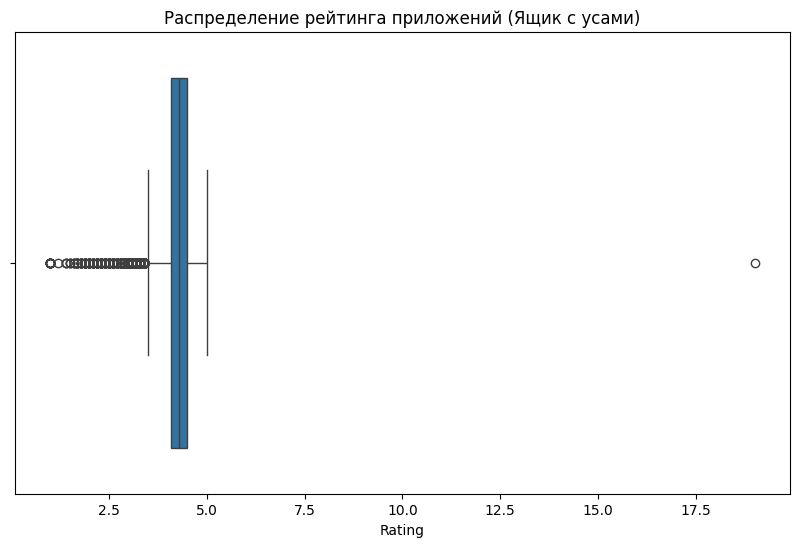

In [82]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Rating'])
plt.title('Распределение рейтинга приложений (Ящик с усами)')
plt.xlabel('Rating')
plt.show()

###  Выбросы

In [83]:
print("\nСтатистика по колонке Rating:")
print(df['Rating'].describe())

Q1 = df['Rating'].quantile(0.25)
Q3 = df['Rating'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
outliers = df[(df['Rating'] < lower_bound) | (df['Rating'] > upper_bound)]
print(f"\nКоличество выбросов: {len(outliers)}")


Статистика по колонке Rating:
count    10841.000000
mean         4.207841
std          0.500893
min          1.000000
25%          4.100000
50%          4.300000
75%          4.500000
max         19.000000
Name: Rating, dtype: float64

Количество выбросов: 734


Для построения моделей машинного обучения на датасете Google Play Store я бы выбрал следующие признаки

1. Категориальные признаки
- Category (категория приложения). Влияет на популярность и рейтинг (например, игры и соцсети имеют разную аудиторию).

- Type (платное/бесплатное). Бесплатные приложения обычно имеют больше установок.

- Content Rating (возрастной рейтинг). Например, приложения для взрослых могут иметь меньше установок.

- Genres (жанры). Более детализировано, чем Category. Например, "Action Games" vs "Puzzle Games".

2. Числовые признаки
- Rating (рейтинг приложения). Прямо влияет на популярность. Может быть целевой переменной.

- Reviews (количество отзывов). Чем больше отзывов, тем популярнее приложение.

- Installs (количество установок). Главный показатель успеха приложения. Может быть целевой переменной.

- Price (цена). Платные приложения имеют меньшую аудиторию.